$\newcommand{\dx}{\mathrm{d}x}$
$\newcommand{\dy}{\mathrm{d}y}$
$\newcommand{\dz}{\mathrm{d}z}$
$\newcommand{\du}{\mathrm{d}u}$
$\newcommand{\dv}{\mathrm{d}v}$
$\newcommand{\dX}{\mathrm{d}X}$
$\newcommand{\dY}{\mathrm{d}Y}$
$\newcommand{\dZ}{\mathrm{d}Z}$
$\newcommand{\nm}{\nano\meter}$
$\newcommand{\nmq}[1]{\SI{#1}{\nm}}$
$\newcommand{\newq}[1]{\SI{#1}{\newton}}$
$\newcommand{\kboltz}{k_{\mathrm{B}}}$
$\newcommand{\Deriv}[2]{\frac{\mathrm{d}#1}{\mathrm{d}#2}}$
$\newcommand{\Derivv}[2]{\frac{\mathrm{d}^2 #1}{\mathrm{d}#2^2}}$
$\newcommand{\PDeriv}[2]{\frac{\partial #1}{\partial #2}}$
$\newcommand{\half}{\frac{1}{2}}$

$\newcommand{\im}{\mathrm{i}}$
$\newcommand{\ee}{\mathrm{e}}$
$\newcommand{\del}{\partial}$
$\newcommand{\deta}{\mathrm{d}\eta}$
$\newcommand{\ds}{\mathrm{d}s}$
$\newcommand{\eps}{\varepsilon}$
$\newcommand{\sgn}{\mathrm{sgn}}$
$\newcommand{\dt}{\mathrm{d}t}$
$\newcommand{\dtau}{\mathrm{d}\tau}$
$\newcommand{\dd}{\mathrm{d}}$
$\newcommand{\Deriv}[2]{\frac{\dd#1}{\dd#2}}$

In [1]:
import sys
import sympy as sy
from sympy.abc import *
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.ticker as mtick
from matplotlib.mlab import griddata
import matplotlib.colors as colors
from matplotlib.ticker import MaxNLocator
from matplotlib.colors import BoundaryNorm
import mpmath as mp
import seaborn as sns
sns.set(font_scale = 2.0)
import scipy as sci
import scipy.special as special
import scipy.constants as const
import scipy.optimize as optimize
from scipy.interpolate import interp1d
import matplotlib as mpl
mpl.rcParams['lines.linewidth'] = 2
mpl.rc('font', family='DejaVu Sans')
#mpl.rc('font', weight='bold')
mpl.rcParams['axes.linewidth'] = 2
mpl.rcParams['xtick.major.width'] = 2
mpl.rcParams['ytick.major.width'] = 2
#Customizations
import matplotlib as mpl
# mpl.rcParams['font.size'] = 16
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['font.sans-serif'] = ['Helvetica']
# for Palatino and other serif fonts use:
# rc('font',**{'family':'serif','serif':['Palatino']})
mpl.rc('text', usetex=True)
mpl.rcParams['text.latex.preamble'] = [
       r'\usepackage[version=4]{mhchem}',# chemical reactions
       r'\usepackage{siunitx}',   # i need upright \micro symbols, but you need...
       r'\sisetup{detect-all}',   # ...this to force siunitx to actually use your fonts
       r'\usepackage{helvet}',    # set the normal font here
       r'\usepackage{sansmath}',  # load up the sansmath so that math -> helvet
       r'\sansmath'               # <- tricky! -- gotta actually tell tex to use!
] 
sy.init_printing()
import itertools as itt
current_palette = sns.color_palette()
#sbn.set_style('darkgrid', {'axes.linewidth': '1', 'axes.edgecolor': '0.15'})
# sbn.set_style("whitegrid", {'axes.grid' : False})
#sbn.set_style("whitegrid", {'axes.linewidth': '1', 'axes.edgecolor': '0.15'})
sns.set_style("whitegrid", {'axes.linewidth': '1', 'axes.edgecolor': '0.15',
                            "xtick.major.size": 8, "ytick.major.size": 8,
                            "xtick.minor.size": 4, "ytick.minor.size": 4})
#sbn.palplot(current_palette = sbn.color_palette())
sns.palplot(current_palette)
plt.show()


<Figure size 1000x100 with 1 Axes>

## Constants

In [2]:
Temperature = 300.0# Particle temperature in Kelvin
KT = const.Boltzmann*Temperature
rho = 2.33*(1e-3/1e-6)# g/cm3 -> Kg/m3
pi = const.pi
eps0 = const.epsilon_0
echarge = const.elementary_charge
Ke = 1.0/(4.0*pi*eps0)
Epsilon = 11.68

## Functions

In [3]:
def beta_free(vol1, vol2, temp=Temperature, rho=rho):
    ''' Coagulation rate in the free molecular regime
    '''   
    beta0 = (3.0/(4.0*np.pi))**(1/6)*np.sqrt(6.0*const.Boltzmann *temp/rho)
    return beta0 * np.sqrt(1.0/vol1 +1.0/vol2) * (vol1**(1.0/3.0)+vol2**(1.0/3.0))**2

In [4]:
def volume_from_radius(radius):
    ''' Compute volume from radius
    '''
    return (4.0 * pi * radius**3)/3.0

In [5]:
def radius_from_volume(volume):
    ''' Compute radius from volume
    '''
    return np.cbrt(volume/(pi*4.0/3.0))

## Variables

In [6]:
radii = np.linspace(0.5, 50.0, 500,endpoint=True)*1e-9# radii = 1 - 50 nm

volumes = volume_from_radius(radii)

rx, ry = np.meshgrid(radii*1e9, radii*1e9)
dx, dy = 2.0*rx, 2.0*ry
vx, vy = np.meshgrid(volumes, volumes)

bf = beta_free(vx, vy)

## Coagulation rate as a function of particle size

In [7]:
def plot_beta():
    fig, ax = plt.subplots(figsize=(7.5, 5.85))

    levels = [5e-16, 1e-15, 2e-15, 5e-15, 1e-14, 2e-14, 5e-14, 5e-13]
    cf = ax.contourf(dx, dy, bf, levels=levels, cmap=cm.gist_heat_r,  norm=colors.LogNorm(),
                     vmin=levels[0], vmax=levels[-1])
    cs = ax.contour(dx, dy, bf, levels=levels, origin='lower',
                    colors='k', linewidths=1.5)
    cb = fig.colorbar(cf, ax=ax, ticks=levels)
    cb.add_lines(cs)
    cb.ax.set_ylabel(r'Coagulation kernel $(\text{m}^3\text{s}^{-1})$', rotation=270, labelpad=30)
    cb.ax.tick_params(labelsize=18)

    ax.set_xlabel('Diameter of particle 1 (nm)')
    ax.set_ylabel('Diameter of particle 2 (nm)', labelpad=-8)
    xy=np.arange(0, 120, 20)
    xy[0] = 1
    plt.xticks(xy, xy)
    plt.yticks(xy, xy)

    cb.set_ticks(levels)
    cb.set_ticklabels([r'$5{\times}10^{-16}$', r'$1{\times}10^{-15}$', r'$2{\times}10^{-15}$', r'$5{\times}10^{-15}$',
                       r'$1{\times}10^{-14}$', r'$2{\times}10^{-14}$', r'$5{\times}10^{-14}$', r'$5{\times}10^{-13}$'])

    plt.tight_layout()
    #plt.savefig('fig1.eps')
    plt.show()

In [8]:
np.max(bf)

In [9]:
np.min(bf)

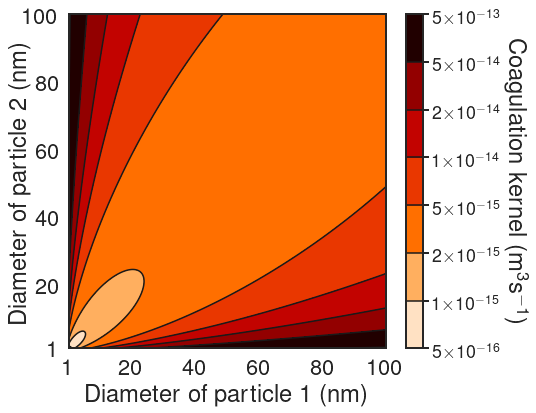

In [10]:
plot_beta()

In [11]:
Nx = 40

In [12]:
ivolumes = np.zeros(Nx+1)

In [13]:
ivolumes[0] = 0.5

In [14]:
ivolumes[Nx] = 1000.0

In [15]:
dexp = (np.log10(ivolumes[Nx])-np.log10(ivolumes[0]))/float(Nx)

In [46]:
dexp

In [47]:
10.0**dexp

In [18]:
for i in range(0, Nx+1):
    ivolumes[i] = ivolumes[0]*10.0**(dexp*(i))

In [19]:
ivolumes

array([5.00000000e-01, 6.04638440e-01, 7.31175287e-01, 8.84193370e-01,
       1.06923460e+00, 1.29300068e+00, 1.56359583e+00, 1.89082029e+00,
       2.28652526e+00, 2.76504213e+00, 3.34370152e+00, 4.04346095e+00,
       4.88966384e+00, 5.91295744e+00, 7.15040272e+00, 8.64681670e+00,
       1.04563955e+01, 1.26446774e+01, 1.52909160e+01, 1.84909512e+01,
       2.23606798e+01, 2.70402531e+01, 3.26991529e+01, 3.95423296e+01,
       4.78176250e+01, 5.78247484e+01, 6.99261313e+01, 8.45600540e+01,
       1.02256518e+02, 1.23656443e+02, 1.49534878e+02, 1.80829071e+02,
       2.18672415e+02, 2.64435496e+02, 3.19775731e+02, 3.86697399e+02,
       4.67624224e+02, 5.65487163e+02, 6.83830552e+02, 8.26940477e+02,
       1.00000000e+03])

In [20]:
volumes = np.zeros(Nx+2)

In [21]:
for i in range(1, Nx+1):
    volumes[i] = 0.5*(ivolumes[i-1]+ivolumes[i])

In [22]:
volumes[0] = 0

In [23]:
volumes[Nx+1] = 100*volumes[Nx]

In [24]:
radii = radius_from_volume(volumes)*1e-9

volumes = volume_from_radius(radii)

rx, ry = np.meshgrid(radii*1e9, radii*1e9)
dx, dy = 2.0*rx, 2.0*ry
vx, vy = np.meshgrid(volumes, volumes)

bf = beta_free(vx, vy)

/opt/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """
/opt/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in multiply
  """


In [25]:
radii

array([0.00000000e+00, 5.08979764e-10, 5.42261909e-10, 5.77720372e-10,
       6.15497461e-10, 6.55744790e-10, 6.98623889e-10, 7.44306849e-10,
       7.92977014e-10, 8.44829718e-10, 9.00073065e-10, 9.58928770e-10,
       1.02163305e-09, 1.08843755e-09, 1.15961039e-09, 1.23543722e-09,
       1.31622236e-09, 1.40229004e-09, 1.49398567e-09, 1.59167727e-09,
       1.69575692e-09, 1.80664233e-09, 1.92477853e-09, 2.05063964e-09,
       2.18473080e-09, 2.32759017e-09, 2.47979111e-09, 2.64194445e-09,
       2.81470098e-09, 2.99875405e-09, 3.19484234e-09, 3.40375282e-09,
       3.62632395e-09, 3.86344898e-09, 4.11607960e-09, 4.38522971e-09,
       4.67197953e-09, 4.97747989e-09, 5.30295690e-09, 5.64971683e-09,
       6.01915136e-09, 2.79384257e-08])

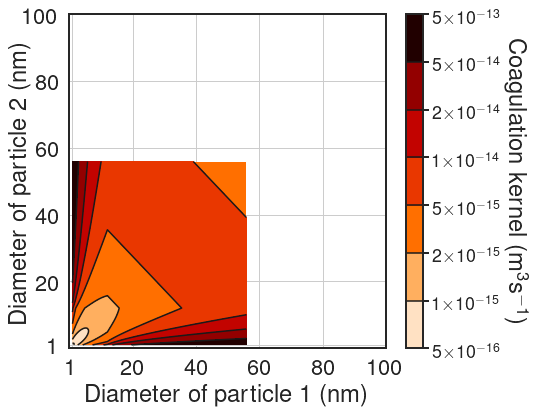

In [26]:
plot_beta()

In [ ]:
radii = radius_from_volume(volumes)
#np.linspace(0.5, 50.0, 500,endpoint=True)*1e-9# radii = 1 - 50 nm

In [27]:
rx, ry = np.meshgrid(radii*1e9, radii*1e9)
dx, dy = 2.0*rx, 2.0*ry
vx, vy = np.meshgrid(volumes, volumes)

bf = beta_free(vx, vy)

/opt/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """
/opt/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in multiply
  """


In [28]:
radii

array([0.00000000e+00, 5.08979764e-10, 5.42261909e-10, 5.77720372e-10,
       6.15497461e-10, 6.55744790e-10, 6.98623889e-10, 7.44306849e-10,
       7.92977014e-10, 8.44829718e-10, 9.00073065e-10, 9.58928770e-10,
       1.02163305e-09, 1.08843755e-09, 1.15961039e-09, 1.23543722e-09,
       1.31622236e-09, 1.40229004e-09, 1.49398567e-09, 1.59167727e-09,
       1.69575692e-09, 1.80664233e-09, 1.92477853e-09, 2.05063964e-09,
       2.18473080e-09, 2.32759017e-09, 2.47979111e-09, 2.64194445e-09,
       2.81470098e-09, 2.99875405e-09, 3.19484234e-09, 3.40375282e-09,
       3.62632395e-09, 3.86344898e-09, 4.11607960e-09, 4.38522971e-09,
       4.67197953e-09, 4.97747989e-09, 5.30295690e-09, 5.64971683e-09,
       6.01915136e-09, 2.79384257e-08])

In [29]:
np.power(2, range(10))

array([  1,   2,   4,   8,  16,  32,  64, 128, 256, 512])

In [30]:
volumes

array([0.00000000e+00, 5.52319220e-28, 6.67906863e-28, 8.07684328e-28,
       9.76713985e-28, 1.18111764e-27, 1.42829826e-27, 1.72720806e-27,
       2.08867277e-27, 2.52578370e-27, 3.05437183e-27, 3.69358124e-27,
       4.46656240e-27, 5.40131064e-27, 6.53168008e-27, 7.89860971e-27,
       9.55160611e-27, 1.15505364e-26, 1.39677967e-26, 1.68909336e-26,
       2.04258155e-26, 2.47004664e-26, 2.98697030e-26, 3.61207412e-26,
       4.36799773e-26, 5.28211867e-26, 6.38754399e-26, 7.72430926e-26,
       9.34082861e-26, 1.12956481e-25, 1.36595661e-25, 1.65181975e-25,
       1.99750743e-25, 2.41553955e-25, 2.92105613e-25, 3.53236565e-25,
       4.27160811e-25, 5.16555693e-25, 6.24658857e-25, 7.55385514e-25,
       9.13470238e-25, 9.13470238e-23])

In [31]:
vmin = volume_from_radius(0.5e-9)

In [32]:
vmin

In [33]:
base = 10

In [34]:
base

In [48]:
dexp

In [49]:
power = 1.0*dexp

In [36]:
power

In [37]:
minvoliface = 2.0*vmin/(1.0+base**power) #vmin = (vo+v1)/2 = vo+base*vo/2

In [38]:
minvoliface

In [39]:
ifaces = minvoliface*np.power(base, power*np.arange(0, Nx+1))

In [40]:
ifaces

array([4.74000140e-28, 5.73197411e-28, 6.93154377e-28, 8.38215563e-28,
       1.01363470e-27, 1.22576501e-27, 1.48228929e-27, 1.79249816e-27,
       2.16762659e-27, 2.62126072e-27, 3.16982998e-27, 3.83320211e-27,
       4.63540269e-27, 5.60548531e-27, 6.77858379e-27, 8.19718466e-27,
       9.91266589e-27, 1.19871577e-26, 1.44957927e-26, 1.75294269e-26,
       2.11979307e-26, 2.56341675e-26, 3.09988061e-26, 3.74861396e-26,
       4.53311219e-26, 5.48178777e-26, 6.62899921e-26, 8.01629549e-26,
       9.69392080e-26, 1.17226343e-25, 1.41759106e-25, 1.71426010e-25,
       2.07301511e-25, 2.50684924e-25, 3.03147483e-25, 3.66589242e-25,
       4.43307895e-25, 5.36081989e-25, 6.48271555e-25, 7.83939804e-25,
       9.48000281e-25])

In [41]:
vols = 0.5*(ifaces[1:]+ifaces[:-1])

In [42]:
rads = radius_from_volume(vols)

In [43]:
rads*1e9

array([0.5       , 0.53269496, 0.56752784, 0.60463844, 0.6441757 ,
       0.6862983 , 0.73117529, 0.77898678, 0.82992466, 0.88419337,
       0.9420107 , 1.00360871, 1.0692346 , 1.13915176, 1.21364081,
       1.29300068, 1.37754989, 1.46762777, 1.56359583, 1.66583924,
       1.77476833, 1.89082029, 2.01446087, 2.14618631, 2.28652526,
       2.43604096, 2.59533349, 2.76504213, 2.94584802, 3.13847678,
       3.34370152, 3.5623459 , 3.79528741, 4.04346095, 4.30786254,
       4.58955332, 4.88966384, 5.20939857, 5.55004072, 5.91295744])

In [44]:
dexp

In [50]:
vols

array([5.23598776e-28, 6.33175894e-28, 7.65684970e-28, 9.25925132e-28,
       1.11969985e-27, 1.35402715e-27, 1.63739372e-27, 1.98006238e-27,
       2.39444365e-27, 2.89554535e-27, 3.50151605e-27, 4.23430240e-27,
       5.12044400e-27, 6.19203455e-27, 7.48788422e-27, 9.05492527e-27,
       1.09499118e-26, 1.32414752e-26, 1.60126098e-26, 1.93636788e-26,
       2.34160491e-26, 2.83164868e-26, 3.42424728e-26, 4.14086307e-26,
       5.00744998e-26, 6.05539349e-26, 7.32264735e-26, 8.85510814e-26,
       1.07082776e-25, 1.29492725e-25, 1.56592558e-25, 1.89363760e-25,
       2.28993217e-25, 2.76916203e-25, 3.34868363e-25, 4.04948569e-25,
       4.89694942e-25, 5.92176772e-25, 7.16105680e-25, 8.65970042e-25])

In [51]:
volumes

array([0.00000000e+00, 5.52319220e-28, 6.67906863e-28, 8.07684328e-28,
       9.76713985e-28, 1.18111764e-27, 1.42829826e-27, 1.72720806e-27,
       2.08867277e-27, 2.52578370e-27, 3.05437183e-27, 3.69358124e-27,
       4.46656240e-27, 5.40131064e-27, 6.53168008e-27, 7.89860971e-27,
       9.55160611e-27, 1.15505364e-26, 1.39677967e-26, 1.68909336e-26,
       2.04258155e-26, 2.47004664e-26, 2.98697030e-26, 3.61207412e-26,
       4.36799773e-26, 5.28211867e-26, 6.38754399e-26, 7.72430926e-26,
       9.34082861e-26, 1.12956481e-25, 1.36595661e-25, 1.65181975e-25,
       1.99750743e-25, 2.41553955e-25, 2.92105613e-25, 3.53236565e-25,
       4.27160811e-25, 5.16555693e-25, 6.24658857e-25, 7.55385514e-25,
       9.13470238e-25, 9.13470238e-23])

In [52]:
10**dexp

In [58]:
(3.0/(4.0*np.pi))**(1/6)*np.sqrt(6.0*const.Boltzmann *Temperature/rho)*np.sqrt(volume_from_radius(1))*1

In [59]:
1e16*7.3e-17

In [77]:
r0 = 0.5e-9

In [78]:
v0 = volume_from_radius(r0)

In [79]:
v0

In [84]:
(r0**2/np.sqrt(v0))

In [80]:
(r0**2/np.sqrt(v0))*np.sqrt(6.0*const.Boltzmann*Temperature/rho)

In [81]:
1/np.sqrt(6.0*const.Boltzmann *Temperature/rho)

In [67]:
1/((0.5e-9)**2/volume_from_radius(0.5e-9)**(1/2))

## i, j, k, m, l, n

## l, q, p, m, r, n

## m = p

## n = n

## k = m

## l = r

In [86]:
0.5*1.19427e-14

In [87]:
0.5*7.98589e-18

In [88]:
0.5*9.46418e-16

In [92]:
radius_from_volume(2000*v0)*1e9

In [95]:
def comb(nv, nq):
    return nv*nq*nv*nq

In [102]:
comb(50, 56)

In [106]:
xfv = 1291257100

In [107]:
xbs = 3771157600

In [108]:
xbs/xfv

In [109]:
0.523599/.183694

### Titre
$$\begin{align}
\Omega_{ij} = \{
1 &\leq k \leq i, \\
1 &\leq l \leq N_Q, \\
1 &\leq r \leq N_Q, \\
1 &\leq q \leq i \}, \\
\end{align}
$$

$$\begin{align}
\text{Birth} = \sum_{\Omega_{ij}}\frac{1}{2}\eta_{ij}\beta_{klqr}N_{kl}N_{qr}
\end{align}
$$

$$\begin{align}
 \eta_{ij} = \left\{
 \begin{array}{lr}
 \delta(q_j,q_l+q_r)\frac{\tilde{v}_{i+1}-v}{\tilde{v}_{i+1}-\tilde{v}_{i}} & \tilde{v}_{i} \leq v \leq \tilde{v}_{i+1}, \\
 \delta(q_j,q_l+q_r)\frac{v-\tilde{v}_{i-1}}{\tilde{v}_{i}-\tilde{v}_{i-1}} & \tilde{v}_{i-1} \leq v \leq \tilde{v}_{i},
 \end{array}
 \right.
\end{align}
$$




$$\begin{align}
\text{Death} = N_{ij}\sum_{k=1}^{N_V-1}\sum_{l=1}^{N_Q}\beta_{ijkl}N_{kl}
\end{align}
$$

$$ Q_\text{min} \leq q_j + q_l \leq Q_\text{max}, 
$$

$$\begin{align}
\Deriv{N_{ij}}{t} &= B_{ij} + N_{ij} D_{ij} + G_{ij}\\
\frac{N^{k+1}_{ij}- N^k_{ij}}{\Delta t} &\approx B^k_{ij} + N^{k+1}_{ij} D^k_{ij} + G^k_{ij}\\
N^{k+1}_{ij}  &= \frac{N^k_{ij} + \Delta t \left( B^k_{ij} + G_{ij}\right )}{1+ \Delta tD^k_{ij}}\\
\end{align}$$

In [45]:

  # the minimum volume interface that gives vmin = (v0+v1)/2

# Create sections

  #


diams = 2.0*rads